In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df=pd.read_csv("medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### problem statement 

 We are going to predict the INSURANCE CHARGES from given data 

### Data gathering

we are having the dataset in csv format named as MEDICAL INSURANCE.CSV

### Exploratary Data Analysis 

Now we have to perform different operations on the data because this data is going to use in model training 
so that data should be in some reqisite format.

1.find the null value and fill it by required imputation technique(mean,mode,median).
2.find out the outliers and replace it or remove it by different technique.
3.check the datatype of all the features. 

In [4]:
df.info()  # it will gives all the information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isna().sum()   # it will gives the null value present in each feature
                  # here no null value present 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### check the outliers

<AxesSubplot:>

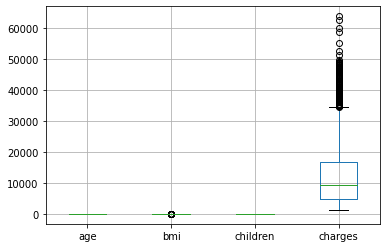

In [6]:
df.boxplot()   # boxplot is graphical method shows outliers

In above boxplot it shows outliers present in bmi and charges 
so we have to remove it otherwise it will impact on our accuracy

Here in charges column shows outlier but charges column is our TARGET column so there is no need to remove the outlier

<AxesSubplot:>

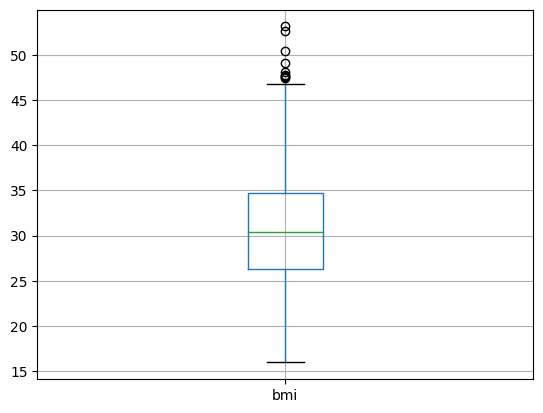

In [9]:
df[["bmi"]].boxplot()

different methods to remove outlier

Z_score,
Iqr method,
transformation method (log,sqrt,cbrt,)
  


In [10]:
# use z_score method

from scipy.stats import zscore
z_score_value=np.abs(zscore(df["bmi"]))
z_score_value

0       0.453320
1       0.509621
2       0.383307
3       1.305531
4       0.292556
          ...   
1333    0.050297
1334    0.206139
1335    1.014878
1336    0.797813
1337    0.261388
Name: bmi, Length: 1338, dtype: float64

In [11]:
array=np.where(z_score_value>2)  # 2 is thresh value
                           # we are index value in the form of array 
array

(array([  28,  116,  128,  172,  198,  232,  250,  286,  292,  356,  380,
         383,  401,  410,  412,  428,  438,  442,  454,  493,  521,  543,
         547,  549,  563,  572,  582,  660,  674,  680,  701,  796,  811,
         821,  847,  860,  867,  895,  930,  941,  950,  951, 1024, 1029,
        1047, 1074, 1085, 1088, 1131, 1133, 1156, 1205, 1226, 1286, 1312,
        1317, 1332], dtype=int64),)

In [12]:
array1=df["bmi"].to_numpy()  # convert that column into array to replace the outlier and save into the dataframe

In [13]:
array1[array]  # accessing outliers ,these are the outliers which has to replace

array([17.385, 49.06 , 17.765, 15.96 , 18.05 , 17.8  , 17.29 , 48.07 ,
       45.54 , 43.89 , 17.955, 43.34 , 47.52 , 17.48 , 17.195, 16.815,
       46.75 , 43.01 , 46.53 , 43.4  , 44.22 , 47.41 , 46.7  , 46.2  ,
       44.77 , 43.12 , 45.43 , 46.53 , 43.89 , 17.4  , 44.745, 44.22 ,
       42.94 , 17.67 , 50.38 , 47.6  , 43.7  , 44.   , 46.53 , 46.09 ,
       18.335, 42.9  , 45.32 , 17.29 , 52.58 , 18.335, 18.3  , 47.74 ,
       45.9  , 18.335, 44.88 , 17.86 , 16.815, 17.29 , 42.9  , 53.13 ,
       44.7  ])

In [14]:
df[["bmi"]].iloc[array].head()  # in the form of dataframe

,bmi
28,17.385
116,49.060
128,17.765
172,15.960
198,18.050


In [15]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
### replace the outliers
array1[array]=df["bmi"].mean()  # here mean and mode is same so use any mean or median otherwise go through median always 
                                # cause outlier impact on mean value

In [17]:
array1[array]
df[["bmi"]].iloc[array].head()  # successfully replace the outliers

,bmi
28,30.663397
116,30.663397
128,30.663397
172,30.663397
198,30.663397


<AxesSubplot:>

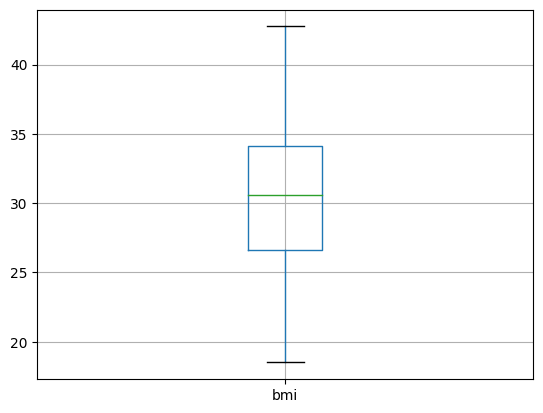

In [18]:
df[["bmi"]].boxplot()

### Feature engineering

our dataset contains categorical column so whenever you are going to train the model the all the data should be
in the numerical formatt so we have to convert that catagerical column into numerical so,
we use encoding technique for this 

Get dummies() and
labal encoding

In [ ]:
df.head()

feature(sex,region) having the catagerical data 

for feature sex we use Labal encoding cause order is define.... 
for feature region we use get dummies cause we cannot define the order of that catagarical data


In [19]:
df["sex"].replace({"male":1,"female":0},inplace=True)  # labal encoding

In [102]:
dict1={"male":1,"female":0}

In [20]:
df=pd.get_dummies(df,columns=["region"])  # get dummies

In [21]:
df["smoker"].nunique()

2

In [22]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [23]:
df["smoker"].replace({"yes":0,"no":1},inplace=True)

In [103]:
dict2={"yes":0,"no":1}

In [24]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,0,16884.92400,0,0,0,1
1,18,1,33.770,1,1,1725.55230,0,0,1,0
2,28,1,33.000,3,1,4449.46200,0,0,1,0
3,33,1,22.705,0,1,21984.47061,0,1,0,0
4,32,1,28.880,0,1,3866.85520,0,1,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


so above data is in ready format for training the model
all features are in numerical format 
and having datatype float and int

### Feature selection 

Now our data is ready from the different data analysis technique.
so it very important to select proper features to get the good accuracy of model 


<AxesSubplot:>

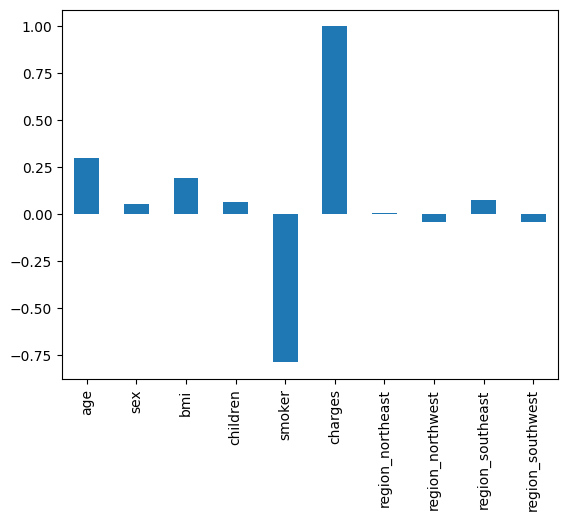

In [26]:
# Coefficent of co relation (r)
df1=df.corr()
df1["charges"].plot(kind="bar")


<AxesSubplot:>

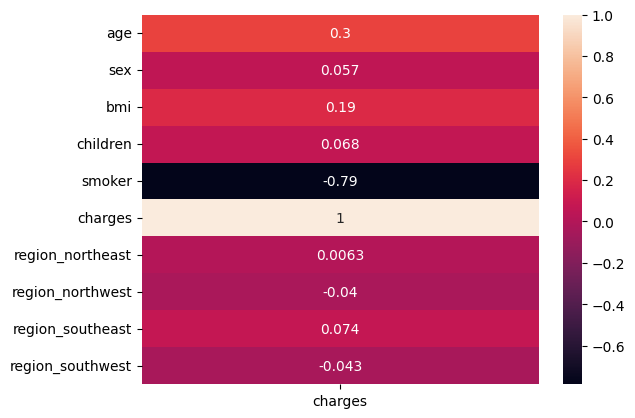

In [27]:
k=df1[["charges"]]
sns.heatmap(k,annot=True)
# sns.heatmap(df1["charges"],annot=True)


Coefficient of corelation having range -1 to 1
range 0.7 to 1  and -0.7 to -1 having good range 
range 0 to 0.3 bad range 

from above graph we can say some of the features not having good range of r


#### variance_inflation_factor

In [28]:
x=df.drop("charges",axis=1)  # remove target column no need to finding out vif factor
x.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,0,0,0,0,1
1,18,1,33.770,1,1,0,0,1,0
2,28,1,33.000,3,1,0,0,1,0
3,33,1,22.705,0,1,0,1,0,0
4,32,1,28.880,0,1,0,1,0,0


<AxesSubplot:>

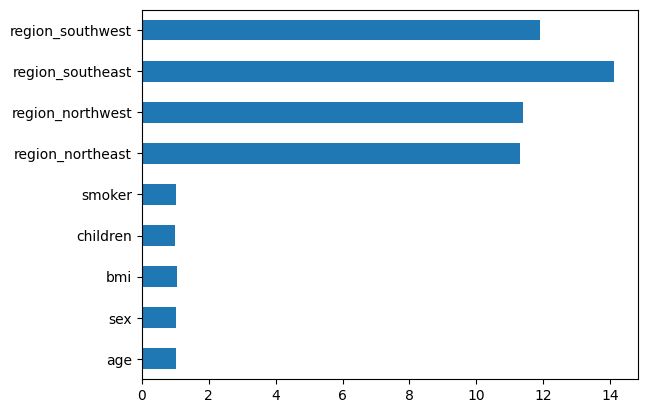

In [33]:
lst=[]
for i in range(x.shape[1]):
    vif=variance_inflation_factor(x,i)
    lst.append(vif)
    
lst 
s1=pd.Series(lst,index=x.columns)
s1.plot(kind="barh")

from above graph we got the vif factor for all features
vif factor having range 0 to infinity

0 indicates no corelation present 
0-5 moderate coralation present between the features
above 10 highly corelated to each other


here rigion colums having highly corelation shows 



### model training

In [34]:
x=df.drop("charges",axis=1)  # remove target column no need to finding out vif factor
x.head()
y=df["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=10)

In [155]:
model=LinearRegression()

In [156]:
model.fit(x_train,y_train)    # model is trained

LinearRegression()

In [ ]:
# test the model

In [157]:
y_test_pred=model.predict(x_test)


In [39]:
y_test_pred
S1=pd.Series(y_test_pred)
S2=pd.Series(y_test)
s2=S2.reset_index(drop=True)
dfnew1=pd.DataFrame()
dfnew1["actual"]=s2
dfnew1["predicted"]=S1
# dfnew["residual"]=dfnew["actual"]-dfnew["predicted"]
# dfnew.head()
dfnew1.head(100)
dfnew1

,actual,predicted
0,7281.50560,7953.499223
1,5267.81815,5662.716812
2,12347.17200,15780.993387
3,24513.09126,11189.986183
4,3736.46470,3497.074624
...,...,...
263,42856.83800,36988.684021
264,3201.24515,8191.041508
265,22493.65964,2298.224000
266,11566.30055,16595.498199


<AxesSubplot:>

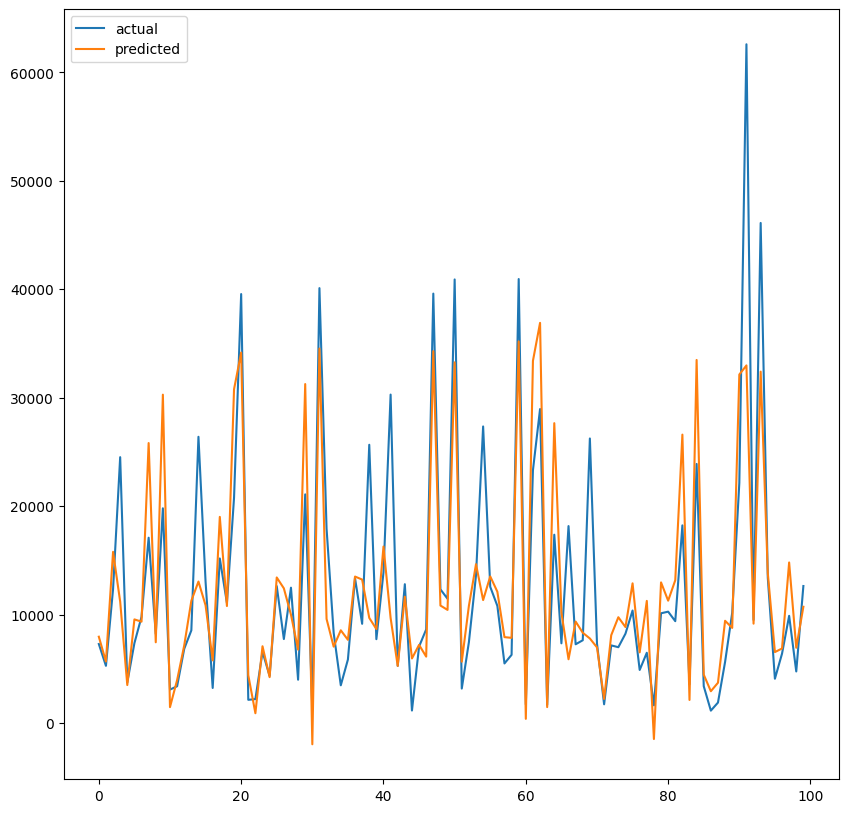

In [40]:
dfnew1.head(100).plot(kind="line",figsize=(10,10))

above graph shows actual and predicted is nearly similar 

check the normality of residual
and homoscadasticity

<AxesSubplot:xlabel='residual', ylabel='Density'>

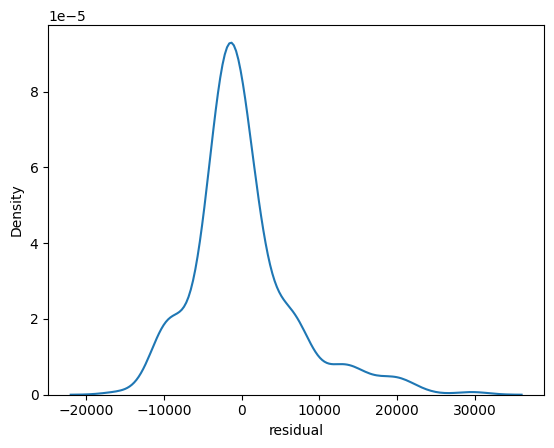

In [43]:
dfnew1["residual"]=dfnew1["actual"]-dfnew1["predicted"]
sns.kdeplot(dfnew1["residual"])

there is positive skewness present so we have to check outliers in target colummn


check homoscadasticity

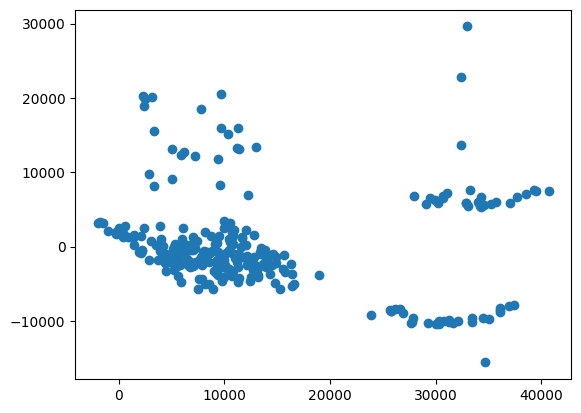

In [45]:
plt.scatter(y_test_pred,dfnew1["residual"])

### Evaluation matrix

In [46]:
mse=mean_squared_error(y_test,y_test_pred)
print("mean squared error is",mse)

mean squared error is 42577603.52126952


In [47]:
rmse=np.sqrt(mse)
print("Root mean squared error is",rmse)

Root mean squared error is 6525.151609063924


In [48]:
mae=mean_absolute_error(y_test,y_test_pred)
print("mean absolute error is",mae)

mean absolute error is 4511.892784174091


In [70]:
from sklearn.metrics import r2_score
r2_test=r2_score(y_test,y_test_pred)
print("accuracy of tesing is",r2_test)  # accuracy of our testing is 69

accuracy of tesing is 0.6964178845632998


In [50]:
y_train_pred=model.predict(x_train)
y_train_pred


array([ 4366.309808  , 10103.9951812 ,  2368.99203745, ...,
        9497.2744516 ,  9598.11686563, 10689.82962889])

In [73]:
r2_train=r2_score(y_train,y_train_pred)
print("accuracy training  is ",r2_train)

accuracy training  is  0.7621630381946345


In [74]:
print("accuracy training  is ",r2_train)
print("accuracy of tesing is",r2_test)
print("mean squared error is",mse)
print("Root mean squared error is",rmse)
print("mean absolute error is",mae)

accuracy training  is  0.7621630381946345
accuracy of tesing is 0.6964178845632998
mean squared error is 42577603.52126952
Root mean squared error is 6525.151609063924
mean absolute error is 4511.892784174091


accuracy of both trining and testing is nearly same if both accuracy having more difference then go through the regularization
RIDGE AND LASSO REGRESSION

### RIDGE REGRESSION

In [153]:
modelr=Ridge(alpha=4)


In [154]:
modelr.fit(x_train,y_train)

Ridge(alpha=4)

In [89]:
y_predR=model.predict(x_test)

In [90]:
y_predRTr=model.predict(x_train)

In [92]:
r2_test=r2_score(y_test,y_predR)
r2_train=r2_score(y_train,y_predRTr)
print("accuracy training  is ",r2_train)
print("accuracy of tesing is",r2_test)

accuracy training  is  0.7618331850145568
accuracy of tesing is 0.698010318474154


#### user input

In [100]:
x.head(1)

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,0,0,0,0,1


In [104]:
print(dict1)
print(dict2)

{'male': 1, 'female': 0}
{'yes': 0, 'no': 1}


In [109]:
column_name=x.columns


In [142]:
age=33
sex="male"
bmi=25
children=0
smoker="yes"
region="southeast"

In [143]:
region="region_"+region
region

'region_southeast'

In [128]:
dict1[sex]

1

In [129]:
dict2[smoker]

0

In [144]:
region_index=np.where(column_name==region)[0][0]

In [145]:
array=np.zeros(x.shape[1])
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [146]:
array[0]=age
array[1]=dict1[sex]
array[2]=bmi
array[3]=children
array[4]=dict2[smoker]
array[region_index]=1

print(array)

[33.  1. 25.  0.  0.  0.  0.  1.  0.]


In [151]:
project_data={"sex":dict1,"smoker":dict2,"columns":list(column_name)}
project_data

{'sex': {'male': 1, 'female': 0},
 'smoker': {'yes': 0, 'no': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [158]:
model

LinearRegression()

In [160]:
import pickle
with open("insurance_model.pkl","wb") as f:
    pickle.dump(model,f) 


In [162]:
import json
with open("data.json","w")as f:
    json.dump(project_data,f)